# 3. Implementar y aplicar transformaciones de rotación y traslación.

Creen una función que:
- Cargue una imagen
- Aplique 5-8 transformaciones sucesivas (traslaciones, rotaciones, escalas)
- Genere un GIF animado o video mostrando la secuencia
- Guarden cada frame intermedio

In [1]:
import cv2
import numpy as np
import imageio
import os
from IPython.display import Image, display

In [ ]:
def generar_animacion(img_path, escala_img=30, num_frames=8, nombre_img='Imagen'):
    """
    Genera una animación tipo GIF a partir de una imagen, aplicando transformaciones 
    (rotación, traslación y escalado) para crear una secuencia dinámica de frames.

    Parámetros:
        img_path (str): Ruta de la imagen original.
        escala_img (int, opcional): Porcentaje de escala para redimensionar la imagen. 
                                    Por defecto es 30 (%).
        num_frames (int, opcional): Número de cuadros que tendrá la animación. 
                                    Por defecto es 8.
        nombre_img (str, opcional): Nombre base con el que se guardarán los archivos. 
                                    Por defecto es 'Imagen'.

    Retorna:
        None. La función guarda los frames generados y el GIF final en las carpetas correspondientes.
    """

    # Carpetas donde se guardarán los frames individuales y el GIF final
    carpeta_frames = f"../Frames_Gif/{nombre_img}"
    carpeta_gif = "../Gifs/"
    os.makedirs(carpeta_frames, exist_ok=True)   # Crea la carpeta si no existe

    ruta_gif = os.path.join(carpeta_gif, f"Gif_{nombre_img}.gif")

    # Carga la imagen desde disco y la convierte de BGR (formato OpenCV) a RGB
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Escala la imagen según el porcentaje indicado
    scale = escala_img / 100.0
    new_w = int(img_rgb.shape[1] * scale)
    new_h = int(img_rgb.shape[0] * scale)
    img_rgb = cv2.resize(img_rgb, (new_w, new_h), interpolation=cv2.INTER_AREA)

    # Obtiene dimensiones y el centro de la imagen
    h, w = img_rgb.shape[:2]
    centro = (w // 2, h // 2)
    frames = []  # Lista para almacenar los frames de la animación

    # Parámetros base para las transformaciones
    max_traslacion = 40 * scale  # Desplazamiento máximo (depende del tamaño de la imagen)
    escala_base = 1.0
    angulo_base = 0

    # Genera cada frame aplicando transformaciones progresivas
    for i in range(num_frames):
        # Calcula desplazamientos horizontales y verticales (trayectoria circular)
        dx = int(np.sin(i * np.pi / num_frames) * max_traslacion)
        dy = int(np.cos(i * np.pi / num_frames) * max_traslacion)

        # Ajusta el factor de escala y ángulo de rotación
        escala = escala_base + 0.1 * np.sin(i * np.pi / 4)
        angulo = angulo_base + i * 15

        # Matriz de transformación afín (rotación + escala + traslación)
        M = cv2.getRotationMatrix2D(centro, angulo, escala)
        M[0, 2] += dx
        M[1, 2] += dy

        # Aplica la transformación a la imagen
        transformada = cv2.warpAffine(img_rgb, M, (w, h))

        # Guarda cada frame individual como archivo PNG
        frame_path = os.path.join(carpeta_frames, f"frame_{i:02d}.png")
        cv2.imwrite(frame_path, cv2.cvtColor(transformada, cv2.COLOR_RGB2BGR))

        # Agrega el frame a la lista para luego crear el GIF
        frames.append(transformada)

    # Crea el GIF a partir de los frames generados (3 cuadros por segundo)
    imageio.mimsave(ruta_gif, frames, fps=3)

    # Muestra la ruta de guardado y el GIF en el entorno interactivo (como Colab o Jupyter)
    print(f"GIF guardado en: {ruta_gif}")
    print(f"Frames guardados en: {carpeta_frames}/")
    display(Image(filename=ruta_gif))


GIF guardado en: ../Gifs/Gif_ImagenDeDia.gif
Frames guardados en: ../Frames_Gif/ImagenDeDia/


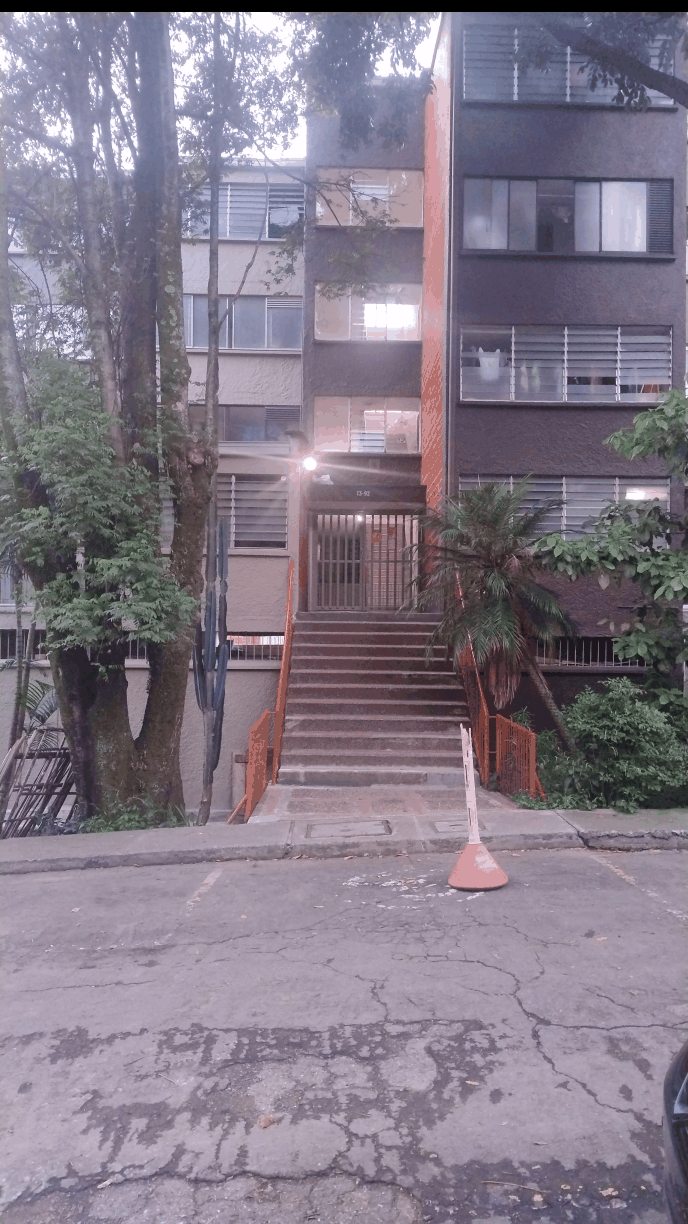

In [4]:
img_path = "../Imagenes Fachada/Img3(SELECCIONADA).jpg"
generar_animacion(img_path, escala_img=30, num_frames=8, nombre_img="ImagenDeDia")

GIF guardado en: ../Gifs/Gif_ImagenDeNoche.gif
Frames guardados en: ../Frames_Gif/ImagenDeNoche/


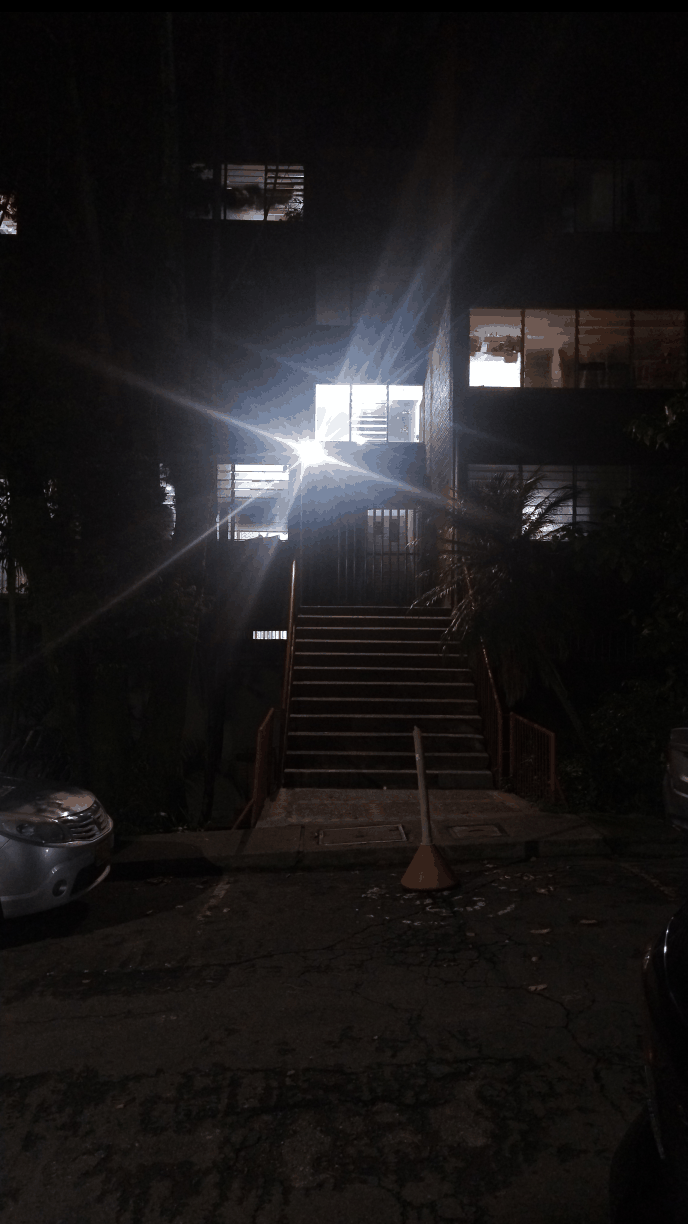

In [5]:
img_path = "../Imagenes Fachada/Img5(SELECCIONADA).jpg"
generar_animacion(img_path, escala_img=30, num_frames=8, nombre_img="ImagenDeNoche")
